In [1]:
import torch
import torch.nn as nn
from torchvision import models , datasets , transforms
from PIL import Image
import  matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2 as cv

image = Image.open("C:/Users/ragha/Downloads/faster.jpg").convert("RGB")
transform = transforms.Compose([
        transforms.ToTensor()
])
image_tensor = transform(image)
image_tensor = image_tensor.unsqueeze(0)
model = models.detection.fasterrcnn_resnet50_fpn_v2(pretrained= True)
model.eval()
with torch.no_grad():
    predictions = model(image_tensor)

print(predictions)


c:\Users\ragha\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ragha\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[{'boxes': tensor([[1109.6024,  977.9385, 1780.2832, 3193.0225],
        [3427.4004, 1060.9917, 4097.9785, 2884.9727],
        [2741.4028, 1230.4922, 3273.6985, 2705.4844],
        [2105.4331, 1075.7212, 2705.5442, 2774.9331],
        [3239.7849, 1717.7476, 3589.6316, 1932.0471],
        [4507.5029, 1340.3477, 6000.0000, 3017.3562],
        [5844.6758, 1208.1064, 5917.0635, 1328.1355],
        [3488.8789,  966.6301, 3707.7861, 1165.5779],
        [2923.0303, 1688.4067, 3008.9941, 1749.8831],
        [5173.8892, 1331.5017, 5999.7729, 1469.8962],
        [2857.9102, 1414.3792, 3171.2280, 1682.8167],
        [3262.8521, 1704.4414, 3420.2002, 1789.8414],
        [4033.4380, 1691.1952, 4458.0781, 1871.2782],
        [3664.8108, 1650.0627, 3765.6567, 1801.5364],
        [2259.0977, 1324.1702, 2623.0188, 1736.9578],
        [5141.8789, 1336.9392, 6000.0000, 1759.0935],
        [4867.1577, 1069.8876, 4937.8545, 1184.0071],
        [5842.7046, 1194.7590, 5996.6802, 1379.4719],
        [3265.480

In [2]:

COCO_INSTANCE_CATEGORY_NAMES = [
    '','__background__','person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

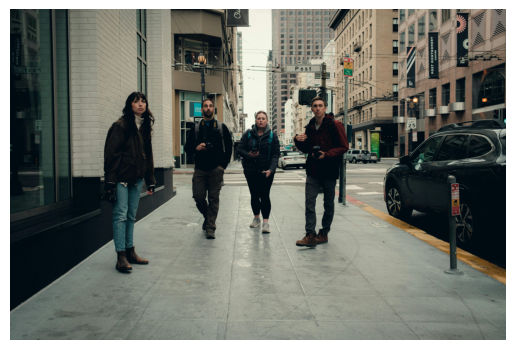

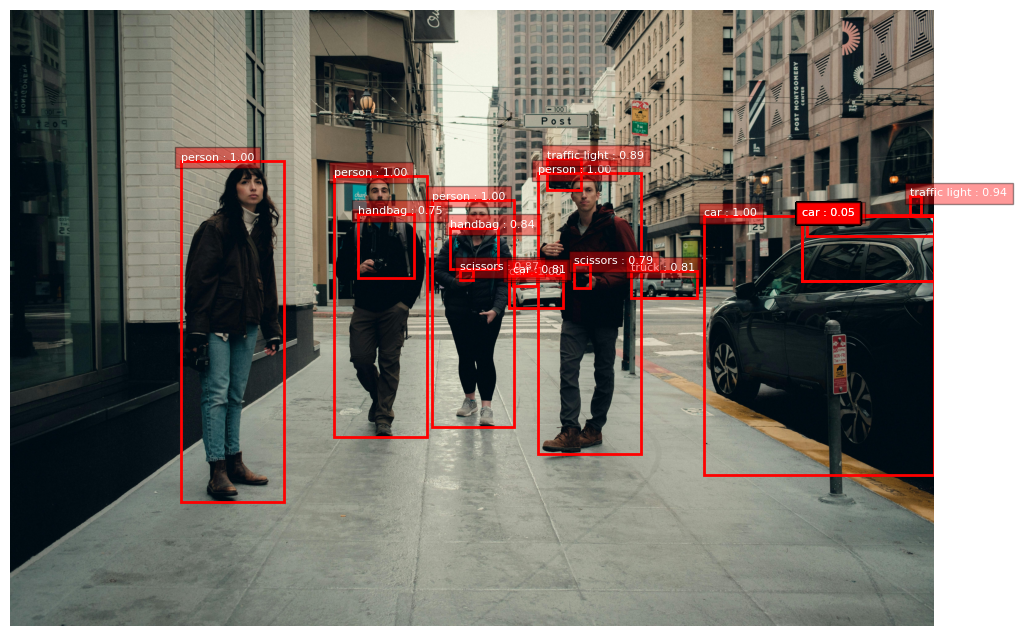

In [3]:
image = cv.imread("C:/Users/ragha/Downloads/faster.jpg")
plt.imshow(cv.cvtColor(image , cv.COLOR_BGR2RGB))
plt.axis("OFF")
plt.show()

image1 = image_tensor.squeeze().detach().cpu().numpy()
image1 = image1.transpose(1,2,0)

fig , ax = plt.subplots(1 , figsize = (12,8))
ax.imshow(image1)

for box , label , score in zip(predictions[0]['boxes'] , predictions[0]['labels'] , predictions[0]['scores']):
    if score.item() > 0.7:
        x1 , y1 , x2 , y2 = box.detach().cpu().numpy()
        label_index = label.item()

    if label_index < 82:
        label_name = COCO_INSTANCE_CATEGORY_NAMES[label_index+1]
        rect = patches.Rectangle((x1,y1) , x2-x1 , y2-y1 , linewidth =2 , edgecolor = 'r' , facecolor = 'none' )
        ax.add_patch(rect)
        plt.text(x1,y1 , f'{label_name} : {score:.2f}' , color = 'white' , fontsize = 8, bbox = dict(facecolor = 'red' , alpha = 0.4) )

plt.axis("OFF")
plt.show()           

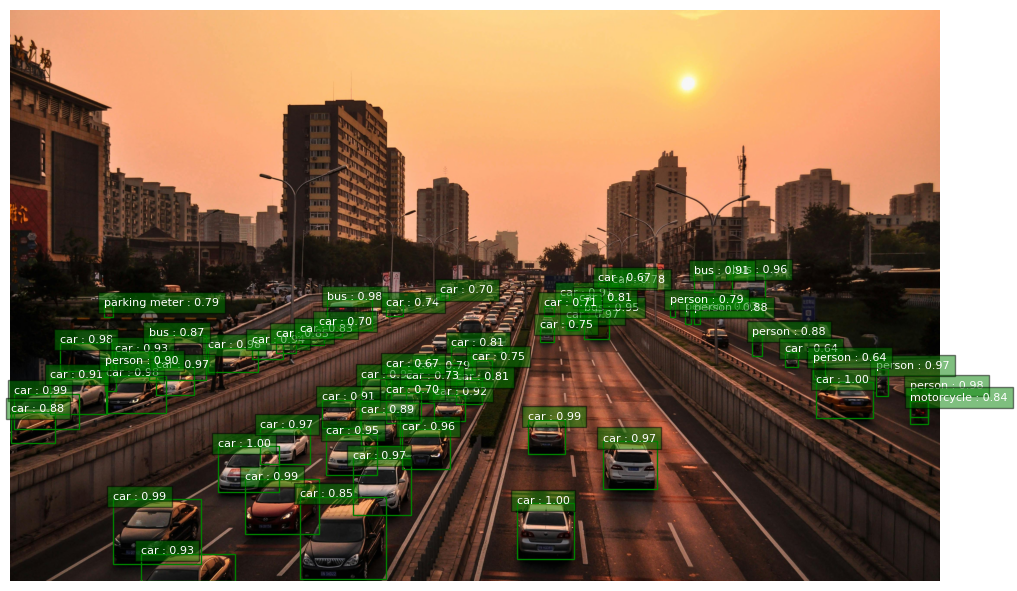

(np.float64(-0.5), np.float64(4287.5), np.float64(2634.5), np.float64(-0.5))

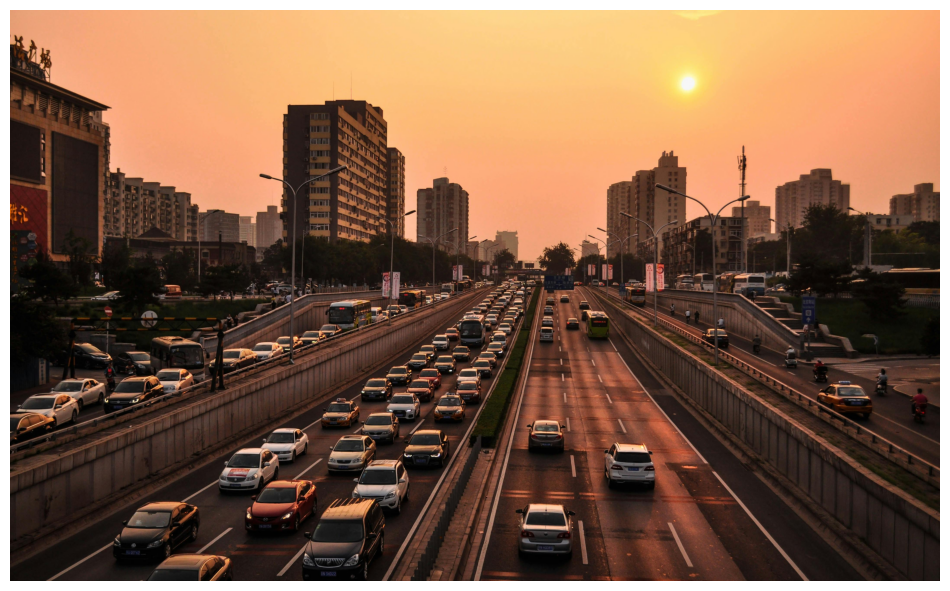

In [5]:
import torch
from torchvision import models,datasets , transforms
import torch.nn as nn
from torch.utils.data import Dataset , DataLoader
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

image = Image.open("C:/Users/ragha/Downloads/carsin traffic.jpg").convert("RGB")
transform =  transforms.Compose([
          transforms.ToTensor()
])
image_tensor =  transform(image)
image_tensor = image_tensor.unsqueeze(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image_tensor = image_tensor.to(device)

model = models.detection.fasterrcnn_resnet50_fpn_v2(pretrained = True)
model.eval()
model = model.to(device)
with torch.no_grad():
    predictions = model(image_tensor)


img = image_tensor.squeeze().detach().cpu().numpy().transpose(1,2,0)
fig , ax = plt.subplots(1 , figsize = (12,8))
ax.imshow(img)

for box , label , score in zip(predictions[0]['boxes'] , predictions[0]['labels'] , predictions[0]['scores']):
    if score.item() > 0.6:
        x1,y1, x2,y2 = box.detach().cpu().numpy()
        label_index = label.item()

        if label_index < len(COCO_INSTANCE_CATEGORY_NAMES):
            label_name = COCO_INSTANCE_CATEGORY_NAMES[label_index+1]
            rect = patches.Rectangle((x1,y1) , x2-x1 , y2-y1 , linewidth = 1 , facecolor = 'none', edgecolor = 'g')
            ax.add_patch(rect)
            plt.text(x1,y1 , f'{label_name} : {score:.2f}' , color = 'white' , fontsize = 8 , bbox = dict(facecolor = 'green' , alpha = 0.5))


plt.axis("OFF")
plt.show()

plt.figure(figsize=(12,8))
plt.imshow(image)
plt.axis("OFF")


FASTER CNN ON VIDEO 

Output video saved at: C:/Users/ragha/Downloads/output_video2.mp4


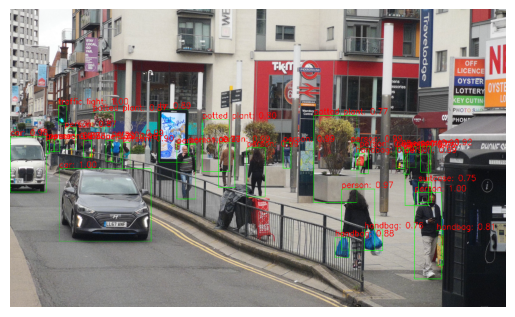

In [8]:
import cv2 as cv
import torch
import numpy as np
from torchvision import models, transforms


COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant',
    'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk',
    'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


model = models.detection.fasterrcnn_resnet50_fpn_v2(pretrained=True)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


video = cv.VideoCapture("C:/Users/ragha/Downloads/5222540-uhd_3840_2160_30fps.mp4")


frame_width = int(video.get(3))  # Width
frame_height = int(video.get(4))  # Height
fps = int(video.get(cv.CAP_PROP_FPS))  # Frames per second

# Define the output video writer
output_path = "C:/Users/ragha/Downloads/output_video2.mp4"
fourcc = cv.VideoWriter_fourcc(*'mp4v') 
out = cv.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

transform = transforms.Compose([transforms.ToTensor()])

while True:
    ret, frame = video.read()
    if not ret:
        break

    # Convert to RGB for PyTorch
    frame_rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)


   

    frame_tensor = transform(frame_rgb).unsqueeze(0)
    frame_tensor.to(device)
  
    with torch.no_grad():
        predictions = model(frame_tensor)



    
    for box, label, score in zip(predictions[0]['boxes'], predictions[0]['labels'], predictions[0]['scores']):
        if score.item() > 0.7: 
            x1, y1, x2, y2 = map(int, box.tolist())
            label_index = label.item()

            if label_index < len(COCO_INSTANCE_CATEGORY_NAMES):
                label_name = COCO_INSTANCE_CATEGORY_NAMES[label_index]

                
                cv.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Red box

            
                text = f"{label_name}: {score:.2f}"
                cv.putText(frame, text, (x1, y1 - 10), cv.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 4)

    out.write(frame)

   
    frame =  cv.resize(frame , (1000,600))
    cv.imshow("Object Detection", frame)
    plt.imshow(cv.cvtColor(frame , cv.COLOR_BGR2RGB))
  
    plt.axis("OFF")
   
    if cv.waitKey(25) & 0xFF == ord('q'):
        break

video.release()
out.release()
cv.destroyAllWindows()

print(f"Output video saved at: {output_path}")


Output video saved at: C:/Users/ragha/Downloads/output_video5.mp4


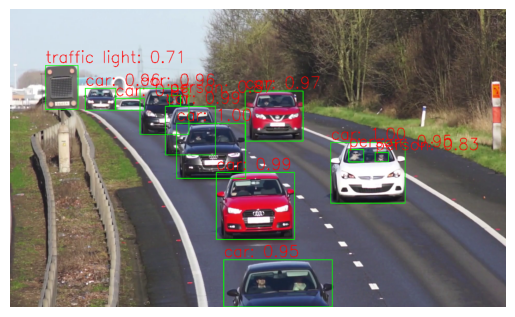

In [10]:
import cv2 as cv
import torch
import numpy as np
from torchvision import models, transforms


COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant',
    'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk',
    'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


model = models.detection.fasterrcnn_resnet50_fpn_v2(pretrained=True)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


video = cv.VideoCapture("C:/Users/ragha/Downloads/carsin.mp4")


frame_width = int(video.get(3))  # Width
frame_height = int(video.get(4))  # Height
fps = int(video.get(cv.CAP_PROP_FPS))  # Frames per second

# Define the output video writer
output_path = "C:/Users/ragha/Downloads/output_video5.mp4"
fourcc = cv.VideoWriter_fourcc(*'mp4v') 
out = cv.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

transform = transforms.Compose([transforms.ToTensor()])

while True:
    ret, frame = video.read()
    if not ret:
        break

    # Convert to RGB for PyTorch
    frame_rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)


   

    frame_tensor = transform(frame_rgb).unsqueeze(0)
    frame_tensor.to(device)
  
    with torch.no_grad():
        predictions = model(frame_tensor)



    
    for box, label, score in zip(predictions[0]['boxes'], predictions[0]['labels'], predictions[0]['scores']):
        if score.item() > 0.7: 
            x1, y1, x2, y2 = map(int, box.tolist())
            label_index = label.item()

            if label_index < len(COCO_INSTANCE_CATEGORY_NAMES):
                label_name = COCO_INSTANCE_CATEGORY_NAMES[label_index]

                
                cv.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Red box

            
                text = f"{label_name}: {score:.2f}"
                cv.putText(frame, text, (x1, y1 - 10), cv.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2)

    out.write(frame)

   
    frame =  cv.resize(frame , (1000,600))
    cv.imshow("Object Detection", frame)
    plt.imshow(cv.cvtColor(frame , cv.COLOR_BGR2RGB))
  
    plt.axis("OFF")
   
    if cv.waitKey(25) & 0xFF == ord('q'):
        break

video.release()
out.release()
cv.destroyAllWindows()

print(f"Output video saved at: {output_path}")
